In [73]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 500)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
df = pd.read_csv(r'data/tweet_data.csv')

In [41]:
print(df.shape)
print(df.columns)
df.head(2)

(785916, 18)
Index(['tweetID', 'crDate', 'edInput', 'editor', 'engages', 'isApproved',
       'isEdNeed', 'isRT', 'likes', 'photoUrl', 'retweets', 'rtUsID', 'text',
       'topicName', 'usFlwrs', 'usID', 'usName', 'videoUrl'],
      dtype='object')


,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,photoUrl,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,videoUrl
0,1070867471245164544,2018-12-07 02:27:55,-1,-1,98,False,True,False,64,https://pbs.twimg.com/media/Dtx8SiIWkAImVsb.jpg,34,-1,The immediate impulse for an alliance of the EU's northern states is Brexit https://t.co/nlhUD36hay https://t.co/shwMWpjjuK,Business,23464532,5988062,The Economist,NaN
1,1070868017888837633,2018-12-07 02:30:05,-1,-1,13,False,True,False,10,https://pbs.twimg.com/media/Dtx8yTyW4AEciqP.jpg,3,-1,"America's economy is flashing some warning signs, but -- for now -- the labor market appears to be going strong https://t.co/xvCPgtqMzy https://t.co/0sQdzAsME3",Business,1732809,16184358,CNN Business,NaN


* After observation of the data, we can see :
1. Columns which are definitelly not be used: crDate, engages, likes, photoUrl, retweets, usFlwrs, rtUsID, usID, videoUrl - will be dropped.
2. Columns which will be definitelly used: tweetID(for indexing purposes), edInput(Label), text, topicName
3. Columns which need more analysis: editor, isApproved, isEdNeed, isRT

In [42]:
df = df[['tweetID', 'edInput', 'editor', 'isApproved',
       'isEdNeed', 'isRT', 'text',
       'topicName', 'usName', ]]

In [43]:
df

,tweetID,edInput,editor,isApproved,isEdNeed,isRT,text,topicName,usName
0,1070867471245164544,-1,-1,False,True,False,The immediate impulse for an alliance of the EU's northern states is Brexit https://t.co/nlhUD36hay https://t.co/shwMWpjjuK,Business,The Economist
1,1070868017888837633,-1,-1,False,True,False,"America's economy is flashing some warning signs, but -- for now -- the labor market appears to be going strong https://t.co/xvCPgtqMzy https://t.co/0sQdzAsME3",Business,CNN Business
2,1070868012864028673,-1,-1,False,True,False,Lyft files for what is expected to be one of the hottest IPOs in 2019 https://t.co/qEjyniazlD,Business,FORTUNE
3,1070867995239555075,-1,-1,False,True,False,"Exporters still waiting to get Rs 6,000 crore worth of input tax credit refunds\n\nMany being denied tax refunds by state governments, such as Andhra Pradesh, Uttar Pradesh, Bihar and Chhattisgarh, who say they are cash starved\n\n@Subhayan_ism @GST_Council\n\nhttps://t.co/QRBg8b98Rr",Business,Business Standard
4,1070867995205885952,-1,-1,False,True,False,Ride-hailing firm Lyft races to leave Uber behind in IPO chase https://t.co/0qCsdx2LYS https://t.co/gHZLUntYkL,Business,Reuters Business
...,...,...,...,...,...,...,...,...,...
785911,1147325851614117888,-1,-1,False,True,True,Relations are DIFFERENT\nnot DIFFICULT.,Motivational,Wit & Wisdom 💯
785912,1153184058714624001,-1,-1,False,True,True,"""to live a creative life, we must lose our fear of being wrong""......... https://t.co/LF0e0xV5Q7",Interesting,DeepFeling™
785913,1153048802116292608,-1,-1,False,True,True,Who's your comic crush? https://t.co/H29dhXw3kf,Memes,Twitter Movies
785914,1154063052997836801,-1,-1,True,True,False,"After a flight of 195 hours, 18 minutes, 35 seconds - the #Apollo11 crew splashed down in the North Pacific Ocean, 900 miles southwest of Hawaii! Here’s a photo of their recovery as we celebrate the #Apollo50th anniversary: https://t.co/Y4zhGTQlPj https://t.co/fBpvcECsjp",Random,NASA


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785916 entries, 0 to 785915
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   tweetID     785916 non-null  int64 
 1   edInput     785916 non-null  int64 
 2   editor      785916 non-null  int64 
 3   isApproved  785916 non-null  bool  
 4   isEdNeed    785916 non-null  bool  
 5   isRT        785916 non-null  bool  
 6   text        785916 non-null  object
 7   topicName   785916 non-null  object
 8   usName      785916 non-null  object
dtypes: bool(3), int64(3), object(3)
memory usage: 38.2+ MB


In [45]:
df['edInput'].value_counts()

-1    422665
 1    215577
 2    106741
 4     32733
 3      8200
Name: edInput, dtype: int64

In [46]:
df['editor'].value_counts()

-1       422665
 5004     68536
 5003     68186
 5002     59317
 5001     52629
 5006     40658
 5007     27722
 5005     24934
 5008     21167
 5101        44
 1001        36
 2001        22
Name: editor, dtype: int64

In [47]:
df['isEdNeed'].value_counts()

True    785916
Name: isEdNeed, dtype: int64

* Dropping 'isEdNeed' as it is the same values for all the rows. Dropping 'editor' as this seems to be an editor IDs.

In [48]:
df = df.drop(columns=['isEdNeed','editor'])

* we can drop rows with 'edinput' other than -1,1,2 as we don't know what they mean and more client communication needed to understand them.

In [49]:
df = df[df['edInput'].isin([-1,1,2])]
df = df.set_index('tweetID', drop=True)

In [50]:
print(df.shape)
df.head(2)

(744983, 6)


,edInput,isApproved,isRT,text,topicName,usName
tweetID,,,,,,
1070867471245164544,-1,False,False,The immediate impulse for an alliance of the EU's northern states is Brexit https://t.co/nlhUD36hay https://t.co/shwMWpjjuK,Business,The Economist
1070868017888837633,-1,False,False,"America's economy is flashing some warning signs, but -- for now -- the labor market appears to be going strong https://t.co/xvCPgtqMzy https://t.co/0sQdzAsME3",Business,CNN Business


* Let's run correlation matrix to see if we not missing anything before dropping IsApproved and isRT.

In [51]:
df[df['edInput']!=-1][['edInput','isApproved','isRT']].corr()

,edInput,isApproved,isRT
edInput,1.000000,-1.000000,0.246425
isApproved,-1.000000,1.000000,-0.246425
isRT,0.246425,-0.246425,1.000000


* As we see from the correlation matrix, we can drop 'isApproved' as it is the same as our label.
* isRT column - after quick google search it seems that it is a boolean column which indicates if the tweet is a retweet or not. We can remove it.
* We also split the data into labeled and not yet labeled data. We need labeled data in order to train our model. I'll keep our unlabeled data to use it later for predictions on the "real world" data.

In [52]:
df = df.drop(columns=['isApproved','isRT'])

In [53]:
df_unlabeled = df[df['edInput']==-1]
df = df[df['edInput']!=-1]

In [54]:
print(df_unlabeled.shape)
print(df.shape)

(422665, 4)
(322318, 4)


In [56]:
df.columns

Index(['edInput', 'text', 'topicName', 'usName'], dtype='object')

In [57]:
df = df[['edInput', 'topicName', 'usName','text' ]]
df

,edInput,topicName,usName,text
tweetID,,,,
1070970722598707200,1,Fashion,Gentleman’s style,Which one would you choose? 👀 https://t.co/U0s3alfBNp
1070981773616648193,1,Interesting,Satisfying Slime,How it’s made. 😊 https://t.co/3XjOw4gIkg
916500037818916866,2,Interesting,Tips & Tricks Ideas ✌,"Smile, because it confuses people. Smile, because it’s easier than explaining what is killing you inside. https://t.co/FGlnnRfP5w"
1071135340696625152,1,Art,𝐴𝑟𝑡.,𝐶𝑙𝑎𝑢𝑑𝑒 𝑀𝑜𝑛𝑒𝑡 https://t.co/WdavWJcSyw
1071141175606829056,1,Animal,Nature is Amazing ☘️,Baby Alpacas are so under appreciated. https://t.co/SDXjKaVscv
...,...,...,...,...
1153952965650079744,1,Flowers,BGCI,Apply for a grant to implement plant conservation at your botanic garden today! https://t.co/gj2eDzIWeB https://t.co/z1iJjZPOFn
1154059414174703617,2,Business,FOOD INSIDER,Are you team Shake Shack or team In-N-Out? https://t.co/3bDmzocr6P
1154061474383441920,1,Art,Phaidon,How @OlafurEliasson's 'hedonistic' dad helped his art https://t.co/x9tFi65TjW @BBCHARDtalk @TheZeinabBadawi https://t.co/Ocuv6jrVbH


* Since we will be clasifying only Business or no business tweets, we need to create a new column which will be :
1. 1 if the 'topicName' == Business and 'edInput' == 1 
2. And 0 otherwise.

In [66]:
df = df.copy(deep=True)
df.loc[:,'IsBusiness'] = np.where((df['topicName']=='Business') & (df['edInput']==1), 1, 0)

* Remiving topicName and edInput columns as we don't need them anymore.

In [71]:
df = df[[ 'IsBusiness', 'usName', 'text']]

* Cheching how balanced our data is:

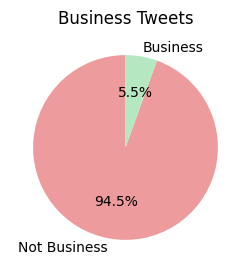

In [84]:
plt.figure(figsize=(3,3))
plt.pie(df['IsBusiness'].value_counts(), labels=['Not Business', 'Business'], autopct='%1.1f%%', startangle=90, colors=['#ED9B9D','#B5E8C0'])
plt.title('Business Tweets')
plt.show()

#### We can clearly see, that the data is not balanced. We will need to balance the data before training the model.
Few possible ways to approach:
1. __Using the correct metrics for imbalanced data.__ I will not use Accuracy as it will not give us a good results as we can classify all samples as "Not Business" and get an accuracy of 94.5%, yet totally failing to catch "Business" samples. I'll use F1 score. F1 is a harmonic mean of precision and recall. It is a good metric to use when we have imbalanced data.
2. __Oversampling__ - Randomly increasing of the minority class using the same data points. This technic can be pron to overfitting, especially if we oversample too much.  
3. __Synthetic Minority Oversampling Technique - SMOTE__ - This technic will create new samples based on the existing ones. It will not overfit as much as the oversampling, but it can be pron to overfitting as well. This generaes "Similar" samples, but not the same.
3. __Undersampling__ - This will help us to balance the data, but we will lose some of the data randomly truncated. Using this we can lose some crutial information. 
5. __Using Bagging__ - BalancedBaggingClassifier - sklearn classifier but with additional balancing.
6. __Treshhold moving + Grid Search__ - We can try to move the treshhold for the classification and see if we can get better results. For imbalanced data sets default 0.5 treshhold doesn't work well. We can also use Grid Search to find the best treshhold.

* Before dealing with the imbalanced data:
1. Let's clean obvious noise: 
    1. Scikit-learn has basic buit-in text cleanng regex. 
    2. And we need to deal with URLs inside all docs.
    3. As well as with emojis.
    4. And Stopwords.
2. Train the model with the default parameters and see what we get to estimate the baseline.

In [216]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import re
import demoji
from unidecode import unidecode
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vasyl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [214]:
def custom_tokenizer(doc):   
    # define stopwords 
    stops = (stopwords.words('english'))
    stops.extend([])    

    doc = demoji.replace_with_desc(doc, sep=' ') # replace emojis with text
    doc = unidecode(doc) # remove accents
    doc = re.sub(r'http\S+', '', doc) # remove urls
    doc = re.sub(r'\b\d+\b','', doc) # remove numbers
    doc = doc.lower() # decapitalization
    doc = re.findall(r'(?u)\b\w\w+\b', doc) # standard scikit-learn pattern

    tokens = [word for word in doc if word not in stops] # remove stopwords

    return tokens

# ---------------- For testing ----------------
# print(df['text'].iloc[0])
# doc = df['text'].iloc[0] + ' 544' + ' Them' + ' Abig' + ' 東日本大震災から8年'
# custom_tokenizer(doc)

In [215]:
vect = TfidfVectorizer(tokenizer=custom_tokenizer, min_df=3)
vect.fit(df['text'])

# Saving time by saving the vectorizer
with open('TfidfVectorizer.pkl', 'wb') as file:
    pickle.dump(vect, file)

d:\Study 2018 and later\Mignimind Bootcamp\Code\P4-NLP-Tweet-Classification\.venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(min_df=3,
                tokenizer=<function custom_tokenizer at 0x00000208ABA0B790>)

In [219]:
with open('TfidfVectorizer.pkl', 'rb') as file:
    vect = pickle.load(file)

In [230]:
print(f'Vocabulary size: {len(vect.vocabulary_)}')

c = 0
to_print = []
for i, value in enumerate(vect.get_feature_names_out()):
    # print every 2000th key
    if c % 2000 == 0:
        to_print.append(value)
    c += 1
print(f'\nEvery 10000th word: \n {to_print}')
print(f'\nFisrt 25 words: \n {vect.get_feature_names_out()[:25]}')
print(f'\nLast 25 words: \n {vect.get_feature_names_out()[-25:]}')


Vocabulary size: 50916

Every 10000th word: 
 ['00', 'amaze', 'bagholding', 'booty', 'celebrity', 'conjures', 'decides', 'dt_westcalder', 'extinct', 'functioning', 'hallmarkies', 'igtv', 'johnlegend', 'letnaturesing', 'massed', 'mover', 'october', 'petra', 'puartmuseum', 'retrieve', 'sealed', 'solicit', 'supremacist', 'tonywaldmanvo', 'valiant', 'womensweek']

Fisrt 25 words: 
 ['00' '000kg' '000lbs' '000mah' '000s' '000th' '000x' '007_robj' '00am'
 '00pm' '01empero' '01hodl' '01pm' '07beach' '07pm' '07rubens' '0a'
 '0pium07' '0x' '0xproject' '1000postcards' '1000s' '1000x' '1000xm3'
 '100k']

Last 25 words: 
 ['zora' 'zorn' 'zorynaodonnell' 'zrx' 'zte' 'zubarev' 'zucchini' 'zuck'
 'zucker' 'zuckerberg' 'zukav' 'zulu' 'zumthor' 'zuo' 'zur' 'zurab' 'zuri'
 'zurich' 'zuul' 'zuzana' 'zuzudotai' 'zvezda' 'zwirner' 'zzsheyn' 'zzz']
